# 03. Comparison and Pareto Analysis

This notebook computes performance metrics for the screened circuits and performs Pareto optimization.

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
%load_ext autoreload
%autoreload 2

# Add package source to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from cytokine_circuits.core.circuit_factory import row_to_circuit
from cytokine_circuits.core.integration import Integrator
from cytokine_circuits.core.parameters import get_parameters
from cytokine_circuits.comparison.metrics import calculate_response_metrics
from cytokine_circuits.comparison.pareto import calculate_pareto_front_max
from tqdm.notebook import tqdm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
input_path = os.path.join(os.getcwd(), '../data/intermediate/df_screened_topology.csv')
if os.path.exists(input_path):
    df = pd.read_csv(input_path)
    print(f"Loaded {len(df)} screened circuits")
else:
    print("Input file not found. Run 02_screening.ipynb first.")
    df = pd.DataFrame()

Loaded 32 screened circuits


In [28]:
df

,x_on_x_prod,x_on_x_rem,y_on_x_prod,y_on_x_rem,x_on_y_prod,x_on_y_rem,y_on_y_prod,y_on_y_rem,model.num
0,2,0,-1,0,1,0,0,0,A1
1,2,0,-1,0,2,0,0,0,A2
2,2,0,-2,0,1,0,0,0,A3
3,2,0,-2,0,2,0,0,0,A4
4,2,0,-1,0,0,-1,0,0,A5
5,2,0,-1,0,0,-2,0,0,A6
6,2,0,-2,0,0,-1,0,0,A7
7,2,0,-2,0,0,-2,0,0,A8
8,2,0,0,1,1,0,0,0,A9
9,2,0,0,1,2,0,0,0,A10


In [ ]:
# Analysis Loop
results = []

for idx, row in tqdm(df.iterrows()):
    # 1. Create Circuit
    circuit = row_to_circuit(row)
    
    # 2. Assign Parameters
    # This uses the placeholder function `get_parameters`
    # User should modify `cytokine_circuits/core/parameters.py` with actual logic
    params = get_parameters(row)
    # 3. Integrate (Simulate)
    integrator = Integrator(circuit, params)
    
    # Initial condition (e.g., stimulated state, or starting from 0)
    if 'B' in row['model.num']:
        Y0 = [1.0,0.4]
    else:
        Y0 = [0.65,0.04]
    t_final = 10
    dt = 0.001
    
    sim_df = integrator.integrate(Y0, t_final, dt,continue_to_decay=True, tol = 1e-6)
    
    # 4. Calculate Metrics
    # Response Strength (Max X) and Speed
    r_strength, r_speed = calculate_response_metrics(sim_df['t'].values, sim_df['x'].values, sim_df['y'].values)
    
    results.append({
        'index': idx,
        'model.num': row.get('model.num', idx),
        'response_strength': r_strength,
        'response_speed': r_speed
    })

df_results = pd.DataFrame(results)
print(df_results.head())

0it [00:00, ?it/s]

{a_x: 0.01, b_x: 1.75, c_x: 0.75, a_y: 0.01, b_y: 0.1, c_y: 0.05, k_2x: 0.5, k_3x: 0.0, k_4x: 0.0, k_2y: 0.5, k_3y: 0.0, k_4y: 0.0}
{a_x: 0.01, b_x: 1.75, c_x: 0.75, a_y: 0.01, b_y: 0.1, c_y: 0.05, k_2x: 0.5, k_3x: 0.0, k_4x: 0.0, k_2y: 0.5, k_3y: 0.0, k_4y: 0.0}
{a_x: 0.01, b_x: 1.75, c_x: 0.75, a_y: 0.01, b_y: 0.1, c_y: 0.05, k_2x: 0.85, k_3x: 0.0, k_4x: 0.0, k_2y: 0.5, k_3y: 0.0, k_4y: 0.0}
{a_x: 0.01, b_x: 1.75, c_x: 0.75, a_y: 0.01, b_y: 0.1, c_y: 0.05, k_2x: 0.85, k_3x: 0.0, k_4x: 0.0, k_2y: 0.5, k_3y: 0.0, k_4y: 0.0}
{a_x: 0.01, b_x: 1.75, c_x: 0.75, a_y: 0.16999999999999998, b_y: 0, c_y: 0.05, k_2x: 0.5, k_3x: 0.0, k_4x: 0.0, k_2y: 0.0, k_3y: 0.06, k_4y: 0.0}
{a_x: 0.01, b_x: 1.75, c_x: 0.75, a_y: 0.17, b_y: 0.0, c_y: 0.0025, k_2x: 0.5, k_3x: 0.0, k_4x: 0.0, k_2y: 0.0, k_3y: 0.06, k_4y: 0.0}
{a_x: 0.01, b_x: 1.75, c_x: 0.75, a_y: 0.16999999999999998, b_y: 0, c_y: 0.05, k_2x: 0.85, k_3x: 0.0, k_4x: 0.0, k_2y: 0.0, k_3y: 0.06, k_4y: 0.0}
{a_x: 0.01, b_x: 1.75, c_x: 0.75, a_y: 0.1

In [32]:
df_results

,index,model.num,response_strength,response_speed
0,0,A1,2.435357,0.486341
1,1,A2,2.312646,0.472343
2,2,A3,2.188908,0.307905
3,3,A4,2.088199,0.307439
4,4,A5,1.766402,0.384171
5,5,A6,1.728640,0.381819
6,6,A7,1.585760,0.273374
7,7,A8,1.537744,0.271398
8,8,A9,1.207403,0.070043
9,9,A10,1.137889,0.062558


Pareto optimal circuits: (1, 0    A1
Name: model.num, dtype: object)


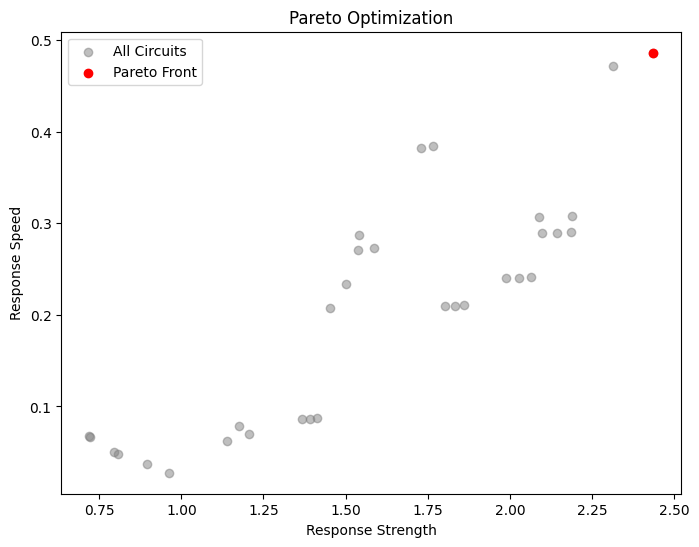

Saved Pareto set to /Users/yaelleb/Desktop/Documents/WIS/Alon Lab/Immune Circuit Scan/Excitability_immune_system/Cytokine_circuits_scan/notebooks/../data/intermediate/df_pareto.csv


In [33]:
# Pareto Analysis
if not df_results.empty:
    points = df_results[['response_strength', 'response_speed']].values
    pareto_indices = calculate_pareto_front_max(points)
    
    df_pareto = df_results.iloc[pareto_indices].copy()
    print(f"Pareto optimal circuits: {len(df_pareto), df_pareto['model.num']}")
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(df_results['response_strength'], df_results['response_speed'], color='grey', alpha=0.5, label='All Circuits')
    plt.scatter(df_pareto['response_strength'], df_pareto['response_speed'], color='red', label='Pareto Front')
    plt.xlabel('Response Strength')
    plt.ylabel('Response Speed')
    plt.title('Pareto Optimization')
    plt.legend()
    plt.show()
    
    # Save Pareto set
    output_path = os.path.join(os.getcwd(), '../data/intermediate/df_pareto.csv')
    # Merge back with original topology info if needed
    df_pareto_full = df.iloc[df_pareto['index']].copy()
    df_pareto_full['response_strength'] = df_pareto['response_strength'].values
    df_pareto_full['response_speed'] = df_pareto['response_speed'].values
    
    df_pareto_full.to_csv(output_path, index=False)
    print(f"Saved Pareto set to {output_path}")